In [1]:
import import_ipynb
import tfm_generic_functions as traffic

import os

# https://keras.io/models/model/
import keras

# https://docs.scipy.org/doc/numpy/reference/
import numpy as np

from keras import models

# Core Layers: https://keras.io/layers/core/
# Convolution Layers: https://keras.io/layers/convolutional/
from keras import layers

# https://matplotlib.org/api/index.html
import matplotlib

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot
import matplotlib.pyplot as plt

importing Jupyter notebook from tfm_generic_functions.ipynb


Using TensorFlow backend.


In [2]:
# Obtenemos el directorio actual como trabajo.
ROOT_PATH = os.getcwd()

weights_bel = "model_data_aug_64_64_Belgium.h5"
weights_ger = "model_data_aug_32_32_German.h5"

# Obtenemos los paths de trabajo
weights_path_bel = os.path.join(ROOT_PATH, weights_bel)
weights_path_ger = os.path.join(ROOT_PATH, weights_ger)

labels_path_bel = os.path.join(ROOT_PATH, "dataset/labels.csv")
labels_path_ger = os.path.join(ROOT_PATH, "dataset_2/labels.csv")

In [3]:
# Recuperamos los nombres de las categorias. Los diferentes tipo de señales
# que se van a clasificar.
titles_bel = traffic.read_csv(labels_path_bel, ",")
titles_ger = traffic.read_csv(labels_path_ger, ",")

In [4]:
def get_keras_model(size_categories, shape):
    # IMPLEMENTACIÓN RED NEURONAL
    # En Keras la envoltura para cualquier red neuronal se crea con la clase Sequential
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5, 5),
                            activation = 'relu', input_shape = shape))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.2))

    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(size_categories, activation='softmax'))
    return model

def load_trained_model(weights_path, size_categories, shape):
    model = get_keras_model(size_categories, shape)
    model.load_weights(weights_path)
    return model

In [5]:
model_bel = load_trained_model(weights_path_bel, len(titles_bel), (64, 64, 3))
model_ger = load_trained_model(weights_path_ger, len(titles_ger), (32, 32, 3))

model_bel.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
model_ger.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
images_test_path = [os.path.join(ROOT_PATH, "images_test/bike_002.jpg"),
                    os.path.join(ROOT_PATH, "images_test/bike_007.jpg"),
                    os.path.join(ROOT_PATH, "images_test/pedestrian_008.jpg")]

Dimensiones de la imagen: (64, 64, 3)
Comprobamos que la imagen este normalizada: MIN: 0.02662760416666668 MAX: 1.0


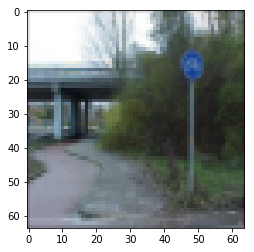

Dimensiones de la imagen: (64, 64, 3)
Comprobamos que la imagen este normalizada: MIN: 0.03787147671568606 MAX: 0.9921568627450981


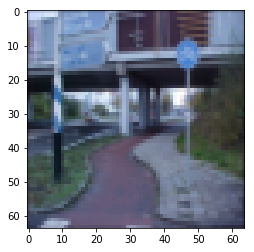

Dimensiones de la imagen: (64, 64, 3)
Comprobamos que la imagen este normalizada: MIN: 0.06372931985294264 MAX: 1.0


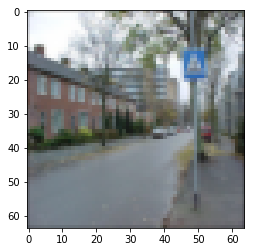

In [8]:
images_test_bel = traffic.get_array_images_test((64, 64))
images_test_ger = traffic.get_array_images_test((32, 32))


for img in images_test_bel:
    print("Dimensiones de la imagen: {}".format(img.shape))
    print("Comprobamos que la imagen este normalizada: MIN: {} MAX: {}".format(img.min(), img.max()))
    plt.imshow(img)
    plt.show()

In [9]:
print("Belgium:")
class_result_bel = model_bel.predict_classes(images_test_bel)
for result_bel in class_result_bel:
    print("Clase resultante: {} y título: {}". format(result_bel, titles_bel[result_bel]))


print("Germany:")
class_result_ger = model_ger.predict_classes(images_test_ger)
for result_ger in class_result_ger:
    print("Clase resultante: {} y título: {}". format(result_ger, titles_ger[result_ger]))

Belgium:
Clase resultante: 38 y título: ['38', 'D7']
Clase resultante: 48 y título: ['48', 'E9c']
Clase resultante: 48 y título: ['48', 'E9c']
Germany:
Clase resultante: 12 y título: ['12', 'priority road (other)']
Clase resultante: 13 y título: ['13', 'give way (other)']
Clase resultante: 41 y título: ['41', 'restriction ends (overtaking) (other)']
